## Research Questions
- What genre of games have the highest sales?
- What kind of ESRB ratings do top selling games have?
- Which publishers have received the most sales?
- What are the sales trends of certain games in different regions?
- Do certain regions lean towards specific game genres?
- On what platform do games receive more sales?
- What is the relationship between the critic & user scores to the game’s sales?
- Are newer games able to compare against older games with sales?
- What is the trend of newer video game releases per console?

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [189]:
df2019 = pd.read_csv('vgsales-12-4-2019.csv')
df2020 = pd.read_csv('vgchartz-7_7_2020.csv')

In [190]:
df2019

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


In [191]:
df2020

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,1981-10-23,2020-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57945,58851,/games/boxart/full_2294305JapanFrontccc.jpg,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,2019-04-03
57946,58852,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
57947,58853,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
57948,58854,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09


In [192]:
df2019.rename({'Name': 'title'}, axis=1, inplace=True)
df2019=df2019[['title','ESRB_Rating']]
df2020.rename({'total_sales': 'global_sales'}, axis=1, inplace=True)
df2019

,title,ESRB_Rating
0,Wii Sports,E
1,Super Mario Bros.,NaN
2,Mario Kart Wii,E
3,PlayerUnknown's Battlegrounds,NaN
4,Wii Sports Resort,E
...,...,...
55787,Indivisible,NaN
55788,Lost Ember,RP
55789,Lost Ember,RP
55790,Lost Ember,RP


In [193]:
df_merged = pd.merge(df2020, df2019,how="inner")
#df_merged = df2020.join(df2019,how="inner",on="title")
#df_merged = pd.concat(df2020, df2019,how="left")
#df_merged = pd.concat([df2020, df2019], axis=1)
#df_merged = pd.merge(df2020, df2019, left_index=True, right_index=True, how='outer')
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130024,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [194]:
df_merged.drop_duplicates(keep='first',inplace=True,subset=df_merged.columns.difference(['title','console','ESRB_Rating','genre','publisher','developer']))
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130022,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
130025,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
130026,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
130027,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [195]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55862 entries, 0 to 130028
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     55862 non-null  int64  
 1   img            55862 non-null  object 
 2   title          55862 non-null  object 
 3   console        55862 non-null  object 
 4   genre          55862 non-null  object 
 5   publisher      55862 non-null  object 
 6   developer      55845 non-null  object 
 7   vg_score       853 non-null    float64
 8   critic_score   6492 non-null   float64
 9   user_score     375 non-null    float64
 10  total_shipped  2209 non-null   float64
 11  global_sales   19193 non-null  float64
 12  na_sales       12872 non-null  float64
 13  jp_sales       6901 non-null   float64
 14  pal_sales      13065 non-null  float64
 15  other_sales    15382 non-null  float64
 16  release_date   52701 non-null  object 
 17  last_update    9865 non-null   object 
 18  ESRB_

In [196]:
df_merged.isnull().sum()

Unnamed: 0           0
img                  0
title                0
console              0
genre                0
publisher            0
developer           17
vg_score         55009
critic_score     49370
user_score       55487
total_shipped    53653
global_sales     36669
na_sales         42990
jp_sales         48961
pal_sales        42797
other_sales      40480
release_date      3161
last_update      45997
ESRB_Rating      31177
dtype: int64

In [197]:
df_merged.dropna(subset=['developer'],inplace=True)
df_merged = df_merged.reset_index(drop=True)
df_merged

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,ESRB_Rating
0,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,2020-03-04,M
1,50,/games/boxart/full_5633331AmericaFrontccc.jpg,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,NaN,M
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,2020-02-03,M
3,144,/games/boxart/full_8688619AmericaFrontccc.jpg,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,NaN,M
4,7454,/games/boxart/full_7401032AmericaFrontccc.jpg,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,2019-05-06,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,58846,/games/boxart/full_7024289AmericaFrontccc.jpg,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,2018-12-17,NaN
55841,58847,/games/boxart/default.jpg,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,2018-12-25,NaN
55842,58848,/games/boxart/default.jpg,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,2018-12-25,NaN
55843,58849,/games/boxart/default.jpg,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,2018-12-25,NaN


In [198]:
df_merged.drop(['Unnamed: 0', 'img','last_update'], axis = 1, inplace=True)
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN


In [199]:
def addTotalSales(df_merged):
    if not pd.isna(df_merged['global_sales']):
        return df_merged['global_sales']
    elif not pd.isna(df_merged['total_shipped']):
        return df_merged['total_shipped']
    else:
        return df_merged['na_sales'] + df_merged['pal_sales'] + df_merged['jp_sales'] + df_merged['other_sales']

In [200]:
df_merged['Total_Sales'] = df_merged.apply(lambda x: addTotalSales(x), axis=1)

In [201]:
df_merged[0:20]

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,35.05
1,God of War,PS2,Action,Sony Computer Entertainment,SCEA Santa Monica Studio,NaN,9.3,NaN,4.62,NaN,NaN,NaN,NaN,NaN,2005-03-22,M,4.62
2,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,22.00
3,Devil May Cry,PS2,Action,Capcom,Capcom,NaN,9.1,9.3,2.16,NaN,NaN,NaN,NaN,NaN,2001-10-16,M,2.16
4,Devil May Cry,NS,Action,Capcom,Capcom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01,M,NaN
5,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,2013-09-17,M,20.32
6,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,NaN,9.7,NaN,NaN,19.39,6.06,0.60,9.71,3.02,2014-11-18,M,19.39
7,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,M,15.86
8,Grand Theft Auto V,PC,Action,Rockstar Games,Rockstar North,NaN,NaN,NaN,12.60,NaN,NaN,NaN,NaN,NaN,2015-04-14,M,12.60
9,Grand Theft Auto V,XOne,Action,Rockstar Games,Rockstar North,NaN,9.0,9.0,NaN,8.72,4.70,0.01,3.25,0.76,2014-11-18,M,8.72


In [202]:
df_merged = df_merged.sort_values('Total_Sales', ascending=False)
df_merged = df_merged.reset_index(drop=True)

In [203]:
df_merged.describe()

,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,Total_Sales
count,853.000000,6492.000000,375.000000,2209.000000,19189.000000,12870.000000,6901.000000,13062.000000,15379.000000,21398.000000
mean,7.380305,7.212400,8.114933,3.902100,0.362932,0.273277,0.109332,0.153633,0.044307,0.728295
std,1.389045,1.455481,1.594707,15.262025,0.826811,0.509090,0.182772,0.396473,0.128626,5.080270
min,2.600000,1.000000,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.700000,6.400000,7.500000,0.190000,0.030000,0.050000,0.020000,0.010000,0.000000,0.040000
50%,7.700000,7.500000,8.500000,0.690000,0.120000,0.120000,0.050000,0.040000,0.010000,0.140000
75%,8.400000,8.300000,9.100000,2.200000,0.360000,0.280000,0.120000,0.140000,0.040000,0.430000
max,9.600000,10.000000,10.000000,310.000000,20.320000,9.760000,2.690000,9.850000,3.120000,310.000000


In [204]:
df_merged.describe(include=object)

,title,console,genre,publisher,developer,release_date,ESRB_Rating
count,55845,55845,55845,55845,55845,52690,24680
unique,36808,77,20,3141,8189,7387,8
top,Plants vs. Zombies,PC,Misc,Unknown,Unknown,1994-01-01,E
freq,20,10954,9153,4607,4410,507,11045


In [205]:
df_merged

,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,global_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,ESRB_Rating,Total_Sales
0,Grand Theft Auto,Series,Action-Adventure,ASC Games,Rockstar North|Rockstar Leeds|Digital Eclipse,NaN,NaN,NaN,310.0,NaN,NaN,NaN,NaN,NaN,1998-03-27,M,310.0
1,Call of Duty,Series,Shooter,Activision,Infinity Ward|Grey Matter Interactive|Treyarch...,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,2003-10-29,T,300.0
2,The Sims,Series,Simulation,Electronic Arts,Maxis,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2000-02-04,T,200.0
3,Minecraft,Series,Sandbox,Mojang,Mojang,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,2011-11-18,NaN,200.0
4,Tetris,Series,Puzzle,Unknown,Alexey Pajitnov|AcademySoft|Andromeda Software...,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,1984-06-06,E,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55840,WILL: A Wonderful World,PC,Visual Novel,AGM Playism,4D Door Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-06,NaN,NaN
55841,Without Within,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-22,NaN,NaN
55842,Without Within 2,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-09,NaN,NaN
55843,Without Within 3,PC,Visual Novel,InvertMouse,InvertMouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-03,NaN,NaN


In [206]:
df_merged.to_csv('Adjusted Video Game Sales Database.csv')

# Consoles

In [17]:
console_count = df_merged['console'].value_counts().rename_axis('Console Name').reset_index(name = 'counts')
console_count =  console_count.nlargest(10, 'counts')
console_count

,Console Name,counts
0,PC,12171
1,PS2,4034
2,DS,3619
3,PS,3019
4,PSN,2492
5,XBL,2348
6,PS3,2271
7,PS4,2117
8,X360,2064
9,PSP,2039


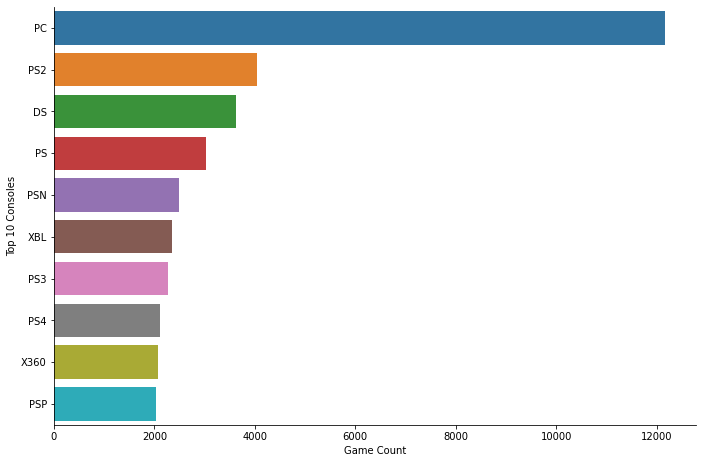

In [18]:
console_plot = sns.catplot(data = console_count, x='counts', y = 'Console Name', kind='bar', orient='h' )
console_plot.fig.set_size_inches(10.5, 6.5)
console_plot.set_axis_labels("Game Count", "Top 10 Consoles")

# ESRB Rating

This section counts how many unique video game titles there are that have the same ESRB

In [19]:
esrbToCount = df_merged[['title', 'ESRB_Rating']]
esrbToCount = esrbToCount.groupby(["ESRB_Rating"], as_index=False)['title'].nunique()
esrbToCount.rename(columns={'ESRB_Rating': 'ESRB Rating', 'title':'Count'}, inplace=True)

esrbToCount = esrbToCount.sort_values(by="Count", ascending=False)

esrbToCount

,ESRB Rating,Count
1,E,7160
7,T,3767
5,M,1703
2,E10,1575
6,RP,229
3,EC,43
0,AO,17
4,KA,3


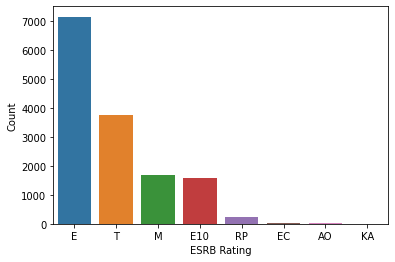

In [20]:
esrbtoCount_plot =  sns.barplot(data = esrbToCount, x = "ESRB Rating", y = "Count")

# Genre

In [21]:
genre_count = df_merged[['title', 'genre']]
genre_count = genre_count.groupby(["genre"], as_index=False)['title'].nunique()
genre_count.rename(columns={'genre': 'Genre', 'title':'Count'}, inplace=True)

genre_count = genre_count.sort_values(by="Count", ascending=False)

genre_count

,Genre,Count
7,Misc,6825
0,Action,5010
2,Adventure,3857
13,Role-Playing,3321
17,Sports,3103
15,Shooter,2917
18,Strategy,2618
11,Puzzle,2361
16,Simulation,2156
10,Platform,2003


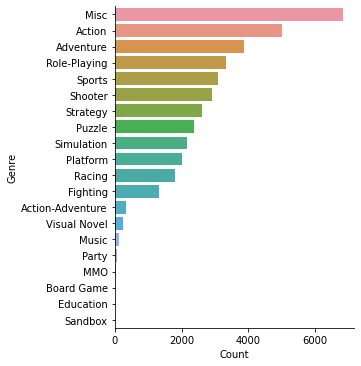

In [22]:
genre_plot = sns.catplot(data = genre_count, x = 'Count', y = 'Genre', orient='h', kind="bar")

# ESRB Rating to Total Sales

In [23]:
esrbToTotal = df_merged[['title', 'ESRB_Rating', 'Total_Sales']]

esrbToTotal

,title,ESRB_Rating,Total_Sales
0,God of War,M,35.05
1,God of War,M,4.62
2,Devil May Cry,M,22.00
3,Devil May Cry,M,2.16
4,Devil May Cry,M,NaN
...,...,...,...
64384,WILL: A Wonderful World,NaN,NaN
64385,Without Within,NaN,NaN
64386,Without Within 2,NaN,NaN
64387,Without Within 3,NaN,NaN


In [24]:
esrbToTotal['Total_Sales'].describe()

count    25211.000000
mean         0.812202
std          5.712646
min          0.000000
25%          0.050000
50%          0.150000
75%          0.470000
max        310.000000
Name: Total_Sales, dtype: float64

### **Checking sales of AO and KA

In [25]:
esrbToTotal_a = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('AO') == True]

esrbToTotal_a = esrbToTotal_a.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_a

,ESRB_Rating,Total_Sales
0,AO,1.41


In [26]:
esrbToTotal_b = esrbToTotal[esrbToTotal['ESRB_Rating'].str.contains('KA') == True]

esrbToTotal_b = esrbToTotal_b.groupby(["ESRB_Rating"], as_index=False)["Total_Sales"].sum()

esrbToTotal_b

,ESRB_Rating,Total_Sales
0,KA,0.0


### Plotting for ESRB to Total Sales

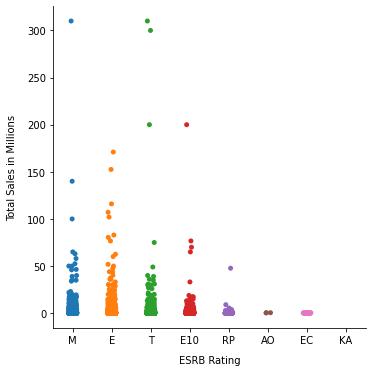

In [27]:
ESRB_sales_plot = sns.catplot(y = 'Total_Sales', x = 'ESRB_Rating', data=esrbToTotal)
ESRB_sales_plot.set_axis_labels("ESRB Rating", "Total Sales in Millions", labelpad=10)

# Genre to Total Sales

In [28]:
df_merged['genre'].describe()

count     64389
unique       20
top        Misc
freq      10060
Name: genre, dtype: object

In [29]:
df_merged['genre'].unique()

array(['Action', 'Action-Adventure', 'Platform', 'Misc', 'Racing',
       'Adventure', 'Role-Playing', 'Fighting', 'Shooter', 'Sandbox',
       'Sports', 'Strategy', 'Puzzle', 'Simulation', 'Visual Novel',
       'Party', 'Education', 'Music', 'Board Game', 'MMO'], dtype=object)

In [30]:
genre_sales =  df_merged.groupby(['genre'], as_index=False)['Total_Sales'].sum()
genre_sales

,genre,Total_Sales
0,Action,2086.52
1,Action-Adventure,2133.08
2,Adventure,754.22
3,Board Game,0.33
4,Education,130.42
5,Fighting,974.46
6,MMO,77.66
7,Misc,1150.87
8,Music,229.16
9,Party,169.98


In [31]:
total_per_genre = genre_sales['Total_Sales']

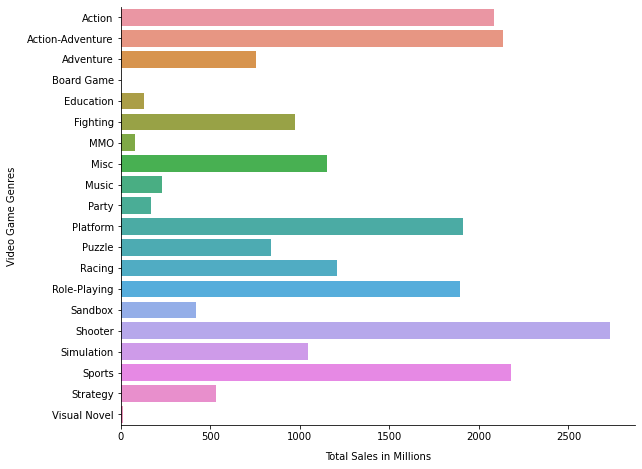

In [32]:
genre_sales_plot = sns.catplot(y = 'genre', x = 'Total_Sales', data=genre_sales, orient='h', kind='bar')
genre_sales_plot.fig.set_size_inches(10.5, 6.5)
genre_sales_plot.set_axis_labels("Total Sales in Millions", "Video Game Genres", labelpad=10)

# Console To Total Sales

In [33]:
df_merged['console'].describe()

count     64389
unique       77
top          PC
freq      12171
Name: console, dtype: object

In [34]:
df_merged['console'].unique()

array(['Series', 'PS2', 'NS', 'PS3', 'PS4', 'X360', 'PC', 'XOne', 'XSX',
       'PS5', 'PS', '2600', 'GB', 'SNES', 'XBL', '5200', 'GEN', 'Int',
       'XB', 'And', 'OSX', 'WinP', 'Linux', 'PSP', 'PSN', 'Wii', 'DS',
       'N64', 'GC', 'DC', 'GBA', 'NGage', 'SAT', '3DS', 'NES', 'VC',
       'ACPC', 'WiiU', 'Arc', 'AST', 'ZXS', 'Amig', 'C64', 'SCD', 'GG',
       'MS', 'PSV', 'S32X', 'Mob', 'Lynx', '7800', 'PCE', 'NG', 'ApII',
       'MSX', 'WS', '3DO', 'WW', 'DSiW', 'DSi', 'FMT', 'MSD', 'AJ',
       'iQue', 'iOS', 'GIZ', 'BRW', 'VB', 'GBC', 'Ouya', 'TG16', 'PCFX',
       'C128', 'CDi', 'CD32', 'BBCM', 'Aco'], dtype=object)

In [35]:
console_sales =  df_merged.groupby(['console'], as_index=False)['Total_Sales'].sum()
console_sales = console_sales.sort_values(ascending=False, by=['Total_Sales'])
console_sales[0:10]

,console,Total_Sales
60,Series,7460.73
49,PS2,1527.63
45,PC,1500.83
69,X360,1254.68
50,PS3,1219.81
66,Wii,1033.33
48,PS,908.55
20,DS,872.62
51,PS4,819.95
39,NES,414.83


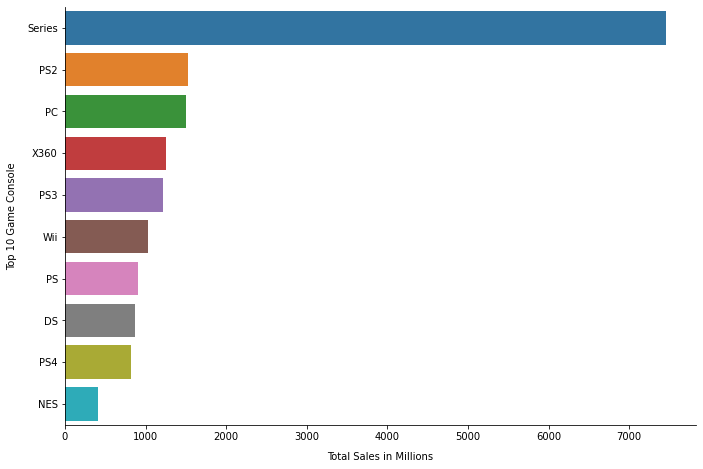

In [36]:
console_sales_plot = sns.catplot(y = 'console', x = 'Total_Sales', data=console_sales[0:10], orient='h', kind='bar')
console_sales_plot.fig.set_size_inches(10.5, 6.5)
console_sales_plot.set_axis_labels("Total Sales in Millions", "Top 10 Game Console", labelpad=10)

# Title to Total Sales

In [37]:
title_total = df_merged[['title', 'Total_Sales', 'console']]

title_total

,title,Total_Sales,console
0,God of War,35.05,Series
1,God of War,4.62,PS2
2,Devil May Cry,22.00,Series
3,Devil May Cry,2.16,PS2
4,Devil May Cry,NaN,NS
...,...,...,...
64384,WILL: A Wonderful World,NaN,PC
64385,Without Within,NaN,PC
64386,Without Within 2,NaN,PC
64387,Without Within 3,NaN,PC


In [38]:
title_total_sum = title_total.groupby(["title", 'console'], as_index=False)['Total_Sales'].sum()
title_total_sum = title_total_sum.sort_values(by='Total_Sales', ascending=False)
title_total_sum = title_total_sum.nlargest(20, 'Total_Sales')
title_total_sum

,title,console,Total_Sales
19158,Grand Theft Auto,Series,620.00
29126,Minecraft,Series,400.00
46721,Tetris,Series,342.00
16389,Final Fantasy,Series,305.00
7367,Call of Duty,Series,300.00
42634,Sonic the Hedgehog,Series,229.92
48010,The Legend of Zelda,Series,214.14
48607,The Sims,Series,200.00
37811,Resident Evil,Series,200.00
2478,Animal Crossing,Series,143.19


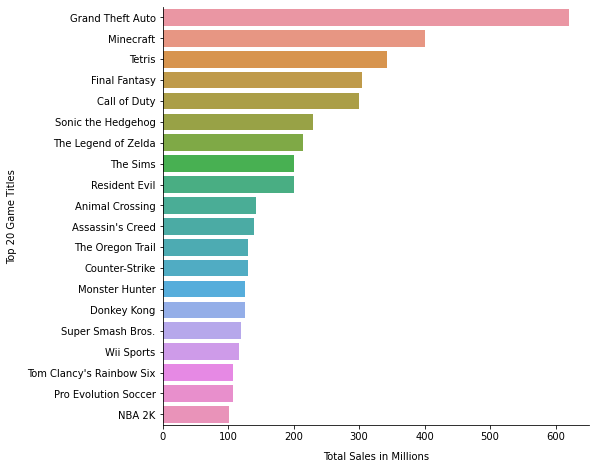

In [39]:
title_total_plot = sns.catplot(data = title_total_sum, x = "Total_Sales", y = "title", kind="bar", orient = 'h')
title_total_plot.fig.set_size_inches(10.5, 6.5)
title_total_plot.set_axis_labels("Total Sales in Millions", "Top 20 Game Titles", labelpad=10)

# Region to Genre Sales

# Publisher to Total Sales

# Trend of New Video Game Releases